# MASK DETEECTION

In [1]:
#import all the required packages
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
import tensorflow.keras as keras
import os

In [2]:
#Extracting and labeling the data
data_path='dataset'
categories = os.listdir(data_path)
labels=[i for i in range(len(categories))]
label_dict=dict(zip(categories,labels))

label_dict

{'with mask': 0, 'without mask': 1}

In [3]:
#changing the resolution of the data
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names= os.listdir(folder_path)
    
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        
        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(gray,(100,100))
            data.append(resized)
            target.append(label_dict[category])
        
        except Exception as e:
            print('Exception:',e)

In [4]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],100,100,1))
target=np.array(target)

In [5]:
from keras.utils import np_utils
new_target=np_utils.to_categorical(target)

In [6]:
np.save('data',data)
np.save('target',new_target)

In [7]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

In [8]:
#Creating the model using CNN for training the data set
classifier = models.Sequential()
classifier.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=data.shape[1:]))
classifier.add(layers.MaxPooling2D((2, 2)))
classifier.add(layers.Conv2D(64, (3, 3), activation='relu'))
classifier.add(layers.MaxPooling2D((2, 2)))
classifier.add(layers.Conv2D(128, (3, 3), activation='relu'))
classifier.add(layers.MaxPooling2D((2, 2)))
classifier.add(layers.Conv2D(128, (3, 3), activation='relu'))
classifier.add(layers.MaxPooling2D((2, 2)))
classifier.add(layers.Flatten())
classifier.add(layers.Dropout(0.5))
classifier.add(layers.Dense(512, activation='relu'))
classifier.add(layers.Dense(1, activation='sigmoid'))

In [9]:
classifier.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [10]:
#Seperating data for tarning and testing
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

In [11]:
#Testing the data
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint = ModelCheckpoint(
  'classifier-{epoch:03d}.classifier',
  monitor='val_loss',
  verbose=0,
  save_best_only=True,
  mode='auto')

history=classifier.fit(
  train_data,
  train_target,
  epochs=20,
  callbacks=[checkpoint],
  validation_split=0.2)

Epoch 1/20
28/28 [==============================] - ETA: 0s - loss: 0.6821 - acc: 0.5727WARNING:tensorflow:From C:\Users\Satvik Atmakuri\anaconda3\lib\site-packages\tensorflow\python\ops\resource_variable_ops.py:1817: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: classifier-001.classifier\assets
28/28 [==============================] - 7s 262ms/step - loss: 0.6821 - acc: 0.5727 - val_loss: 0.6639 - val_acc: 0.5318
Epoch 2/20
28/28 [==============================] - 7s 242ms/step - loss: 0.6540 - acc: 0.6045 - val_loss: 0.6174 - val_acc: 0.5864
Epoch 3/20
28/28 [==============================] - 8s 291ms/step - loss: 0.5872 - acc: 0.6989 - val_loss: 0.5916 - val_acc: 0.6136
Epoch 4/20
28/28 [==============================] - 9s 311ms/step - loss: 0.5290 - acc: 

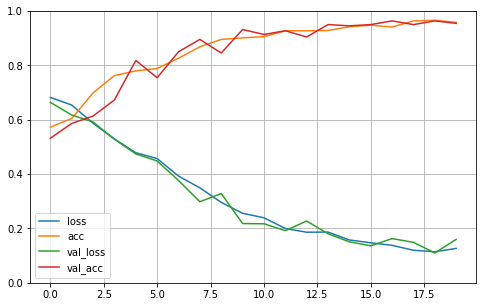

<Figure size 576x432 with 0 Axes>

In [12]:
#Plotting accuracy and loss 
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
figure = plt.gcf() 
figure.set_size_inches(8, 6) 
plt.savefig('loss_accuracy_graph.png',dpi=300, bbox_inches='tight')

In [13]:
#saving the model
classifier.save("model_v3.h5")

In [14]:
#testing the accuracy of the model on testing set
print(classifier.evaluate(test_data,test_target))

9/9 [==============================] - 0s 49ms/step - loss: 0.1681 - acc: 0.9420
[0.16812564432621002, 0.9420289993286133]


In [15]:
#checking the outputs
new=test_data[:2]

In [16]:
y_pred = classifier.predict_classes(new)

print(y_pred)
print(label_dict)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[[1]
 [0]]
{'with mask': 0, 'without mask': 1}


AxesImage(54,36;334.8x217.44)


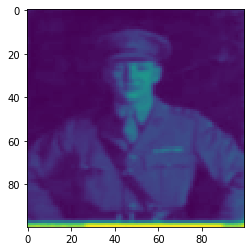

In [17]:
print(plt.imshow(test_data[0].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


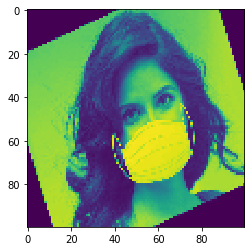

In [18]:
print(plt.imshow(test_data[1].reshape(100,100)))